# Introduction

In [1]:
# Download NLTK resources. Remove code from START_NLTK_TMP to
# END_NLTK_TMP to store them in a permanent location instead of a
# temporary directory.
# --------------------------- START_NLTK_TMP ---------------------------
import os
import tempfile

nltk_data = os.path.join(tempfile.gettempdir(), "v4py", "nltk_data")
os.makedirs(nltk_data, exist_ok=True)
os.environ["NLTK_DATA"] = nltk_data
# ---------------------------- END_NLTK_TMP ----------------------------

import nltk

nltk.download(["punkt", "stopwords"])

[nltk_data] Downloading package punkt to /var/folders/md/j6c4ktwd4355x
[nltk_data]     9f2y8h6xyr40000gn/T/v4py/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /var/folders/md/j6c4ktwd4
[nltk_data]     355x9f2y8h6xyr40000gn/T/v4py/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


**Acknowledgments:** The authors are grateful to [Visegrad
Fund](https://www.visegradfund.org/) grant nr. 21820079 "Training
Digital Scholars: Knowledge Exchange between V4 and Austria" for kindly
sponsoring this project.


- started programming at uni, so it's never too late :)
- probably **the most useful skill** since learning to read

The source code of this book lives in a [GitHub
repository](https://github.com/v4py/v4py.github.io). Please open issues
with requests for clarification, tips for improvement, or even just
typos!

# Python gives you wings!

So what is this Python thing all about?

![Python XKCD](https://imgs.xkcd.com/comics/python.png)

Credit: Randall Munroe, XKCD, <https://xkcd.com/353/>

GvR, The Making of Python: a teaching language, originally for small
programs -> teachability, understandability and readability matters
(unlike R)

Coming from R: Python is a general purpose language -> maybe a bit
harder to find one's way around the landscape for a particular purpose
(e.g. statistics or data science), but it pays off in that you're not
limited by the one intended use, which is a good thing whenever you
embark on a bigger project. R starts to get really ugly really quickly
when using it for anything that's not easily achieved by an existing
library, and though it deserves an honorable mention for having a lot of
libraries with useful functionality, some of them very well-designed
(tidyverse), it's one of the laws of programming that there will always
be at least this one thing in your project that there is no existing
library for (or maybe there is, but you can't seem to find it).

# Target audience

NOTE: transform questions into statements about expected audience.

- Who has programmed before? In what language(s)? Python?
- What's your academic field? Linguistics, history, digital
  humanities...?
- Who is reasonably familiar with working with language data on a
  computer (e.g. corpora etc.)?
- Who knows what regular expressions are? Who uses them?
- What are you hoping to learn this week?

# About Python


> On second thought, let's not go to Camelot. 'Tis a silly place.
>
> -- King Arthur, Monty Python and the Holy Grail


- a simple, fun and approachable programming language
- FLOSS (Free, Libre, Open-Source Software) × e.g. Microsoft Word
- created in 1991 by Guido van Rossum
- why is it named Python?

Using Python:

- Python 2 vs. **Python 3**

# How to use this book

This book actually consists of a series of [Jupyter
notebooks](https://jupyter.org/), which is a file format, recognizable
by its `.ipynb` extension, which intermixes expository prose with
programming code. It can be opened using the
[JupyterLab](https://jupyterlab.readthedocs.io/) application, which runs
in your browser. In the notebooks, code is stored inside code cells
which can be modified and run at will, which encourages interactive
exploration and makes learning easier. This is what a code cell looks
like:

In [2]:
1 + 1

2

You can see the code cell's output right below it -- in this case, it's
a plain old `2`.

If you can, it's a great idea to follow along in JupyterLab, running the
code in each chapter of the book yourself and tinkering with it. There
are several options for that. The easiest one is to use either the **▶
mybinder.org** or **▶ jupyter.korpus.cz** buttons at the top of the
page, which will take care of everything for you and open an interactive
version of this text in your browser, without you needing to install
anything on your computer.

Note that the second button requires that you have an account at
<https://jupyter.korpus.cz> (attendees of the V4Py summer school do),
and due to some bugs in the software which makes this possible, it
doesn't work as intended if you're not already logged in. In that case:

1. Click on the button once and log into JupyterLab.
2. Close the JupyterLab tab.
3. Click on the button a second time. JupyterLab should now
   automatically open the appropriate notebook.
4. If that doesn't happen, try reloading the page.

If you want to install Python on your own computer and run JupyterLab
locally, I would suggest using [the Anaconda
Distribution](https://www.anaconda.com/distribution/), which installs
Python alongside many popular additional packages and libraries for data
analysis. In that case, you'll be opening JupyterLab via the [Anaconda
Navigator](https://docs.anaconda.com/anaconda/navigator/), and you'll
need to [download the notebooks
manually](https://github.com/v4py/v4py.github.io/archive/master.zip)
(after unzipping, the notebooks are in the `content/` subdirectory). If
you don't mind downloading the notebooks individually, you can also use
the download button at the top of the page, but that won't get you any
of the additional files that some of the notebooks rely on.

If you want to learn more about using notebooks, [here's a gallery of
interesting notebooks to help you get acquainted with the
format](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks),
including some introductory tutorials on how to use it right. The
JupyterLab notebook user interface is described in more detail in [their
docs](https://jupyterlab.readthedocs.io/en/latest/user/notebook.html).
Finally, some usage tips which I personally find useful can be found in
the [this blog post](https://dlukes.github.io/jupyter-magic.html)

# Diving right in: a frequency analysis of this text

To get our feet wet, let's do a quick frequency analysis of the text
you're currently reading. If you've never programmed before, don't worry
if parts (or all) of the code below seems a little mysterious!  We'll
cover all of that in much more detail in the following chapters.
However, before we dive into the particulars, I think it's a good idea
to get acquainted with what actual useful Python code looks like, so
that we have a general picture of where we're headed. Without a global
perspective and a clear goal in our heads, it's easy to get discouraged
by the many seemingly unconnected details that await us along the way.

So take a while to look at each code chunk below, try and figure out
what its purpose might be and how it achieves it, try and discover
repeating patterns in Python's syntax and their meaning. Read the
commentary and let the programming vocabulary soak into your brain. It's
alright to be confused, it's OK not to understand precisely what each
and every word means. The goal at this point is to get familiar with how
Python code looks and how the terminology sounds, even if you don't
fully understand what's happening yet.


**HTML** is the [Hypertext Markup
Language](https://en.wikipedia.org/wiki/HTML) and it's what web pages
are built from, specifically their structure. Layout is mostly done
using [CSS](https://en.wikipedia.org/wiki/Cascading_Style_Sheets) and
interactive features with
[JavaScript](https://en.wikipedia.org/wiki/JavaScript).


We start by **importing** `HTMLSession` from the
[`requests_html`](http://html.python-requests.org) **library**, which
contains functionality related to fetching HTML pages from the web.  We
create a fresh `HTMLSession` **object** and store it in the `session`
**variable**. Think of it as a simple web browser inside Python.

In [3]:
from requests_html import HTMLSession

session = HTMLSession()


**HTTP** stands for [Hypertext Transfer
Protocol](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol).
It's the main protocol used for sending around data on the web.


We can fetch the page you're currently reading by calling the `get()`
**method** of the `session` object and passing it the link to this
website as an **argument**. We get back an HTTP response.

In [4]:
link = "https://v4py.github.io/intro.html"
response = session.get(link)

Inspecting the `response` variable, we see `<Response [200]>`. `200` is
the [HTTP status
code](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) which
indicates that all went well with our request and we received a
sucessful response.

In [5]:
response

<Response [200]>

If we don't know or remember which HTTP status code is which, we can
check that everything is fine by inspecting the `.ok` **attribute** on
the `response` object.

In [6]:
response.ok

True

The contents of the web page are stored in the `.html` attribute of the
`response` object.

In [7]:
response.html

<HTML url='https://v4py.github.io/intro.html'>

That attribute is itself an object with attributes and methods of its
own, which allow us to inspect it and manipulate it. For instance, it
has in turn its own `.html` attribute, which contains the raw HTML code
underlying the web page you're reading, stored as a **string** of
**characters**. We can take a look at a **slice** of the first 50
characters of the string, just to make sure we downloaded the right
document.

In [8]:
response.html.html[:50]

'<!DOCTYPE html>\n<html lang="en">\n  <head>\n  <meta '

Uh-oh, I don't remember reading anything about any doctypes at the
beginning of this text. What's this all about? Well this is all part of
the HTML language, which tells your browser how to display this web
page. Trouble is, from our point of view as linguists, this is just junk
that we need to get rid of. One thing we could try is the `.text`
attribute, which extracts only the text parts of a web page.

In [9]:
# the first 50 characters
response.html.text[:50]

'Introduction\n{ "@context": "http://schema.org", "@'

In [10]:
# the last 50 characters
response.html.text[-50:]

'holars: Knowledge Exchange between V4 and Austria"'

That looks somewhat better, but there's clearly still some "junk" left.
Turns out that the "text" content of an HTML page includes not only all
the stuff that's visible on the page (navigation elements, button
labels, and other things we probably want to exclude from our analysis),
but also invisible things like JavaScript programs which add
interactivity to the page (surrounded by `<script/>` tags) or CSS styles
which define the layout and other aesthetic aspects of the page
(surrounded by `<style/>` tags).

Ideally, we'd like to get rid of all of this. How to achieve that? We
first need to figure out which parts of the HTML enclose the content
we're interested in. For that, we'll use our browser's inspector tools.
If you right click anywhere on this page, you should get a menu where on
of the items says something like *Inspect* or *Inspect Element*. Click
on that and a pane will open beside the page which lets you peek under
the hood of this page. If you right click on this paragraph specifically
and select *Inspect Element*, the inspector will focus on where in the
HTML hierarchy this particular paragraph is placed.

![Firefox inspector screenshot](images/intro/inspector.png)

We can see that this paragraph is contained with a `<div/>` HTML element
which has a class of `rendered_html`, among others. This sounds like a
property which could be true of all the interesting content on this page
-- after all, we know it was *rendered* from a Jupyter notebook to HTML
-- so let's go on a limb here and retrieve all of those `divs` using the
`.find()` method. This method uses [CSS
selectors](https://www.w3schools.com/cssref/css_selectors.asp) to slice
and dice the page; all we need to know right now is that the syntax to
find all HTML elements of a certain class is to prefix the class name
with a period, so `.rendered_html` in our case. We get back a **list**
of `divs`; the `clean=True` **keyword argument** makes sure that we
throw away those pesky invisible `<script/>` and `<style/>` tags, if
any.

In [11]:
divs = response.html.find(".rendered_html", clean=True)
divs[:5]

[<Element 'div' class=('text_cell_render', 'border-box-sizing', 'rendered_html')>,
 <Element 'div' class=('text_cell_render', 'border-box-sizing', 'rendered_html')>,
 <Element 'div' class=('text_cell_render', 'border-box-sizing', 'rendered_html')>,
 <Element 'div' class=('text_cell_render', 'border-box-sizing', 'rendered_html')>,
 <Element 'div' class=('text_cell_render', 'border-box-sizing', 'rendered_html')>]

<!-- TODO: explain escape sequence or later? -->

Each of these `divs` has a `.text` attribute, which hopefully contains
reasonable text and not some junk. We'd like to lump it all together
into one long string before moving on to further processing, because we
don't really care which part of the text was in which `div`, we just
want to have it all in one place to make things easy. So we can join all
of those `.text` attributes into one string by splicing a **newline**
character, written using the **escape sequence** `"\n"`, in between
every two pieces of text.

In [12]:
string = "\n".join(div.text for div in divs)
string[:30]

'Acknowledgments: The authors a'

<!-- TODO: explain function vs. method or later? -->

This is starting to look good! We've possibly thrown out some stuff that
could have been included, like the chapter title, but it's definitely
much better than accidentally including all that JavaScript junk in our
analysis. Just to see how much stuff we've gotten rid of, we can compare
the number of characters using the `len()` **function**.

<!-- TODO: add something like "we've cut it roughly in half!" based on how -->
<!-- much it turns out to be in the end -->

In [13]:
len(response.html.full_text), len(response.html.text), len(string)

(35868, 32671, 19737)

Now in order to do a frequency analysis, we need to split that text into
words or **tokens**, which is a technical term used when we want to
avoid the kind of philosophical hairsplitting that linguists sometimes
engage in with respect to what is or is not a word. Referring to words
as 'tokens' is basically a way of saying, "I don't want to pick a fight
about the precise meaning of 'word' right now, I made a pragmatic
decision to split the text into pieces which broadly make sense, but of
course reasonable people might disagree on the details." It also allows
us to be precise that we are referring to specific *instances* of words.
The word 'word' is ambiguous, a sentence like "I know I screwed up." can
be described as containing either 5 (total running) words or 4
(different) words. If we want to avoid confusion, we can say instead
that it consists of **5 tokens** and **4 types**.

Word-splitting or **tokenization** is a trickier problem than it might
seem at first glance, because punctuation keeps getting in the way. So
let's not do it manually ourselves, let's use instead the
`word_tokenize()` function in the [`nltk`](http://www.nltk.org/)
library, which hopefully covers some of the edge cases we wouldn't think
of right off the bat if we were to implement it ourselves off the top of
our head. This function **returns** a list of strings, and again we can
do a sanity check by inspecting a slice of it.

In [14]:
import nltk

tokenized = nltk.word_tokenize(string.lower())
tokenized[100:115]

[',',
 'xkcd',
 ',',
 'https',
 ':',
 '//xkcd.com/353/',
 'gvr',
 ',',
 'the',
 'making',
 'of',
 'python',
 ':',
 'a',
 'teaching']

Looks fine. Notice that before tokenizing the string, we converted in to
**lowercase** using the `.lower()` **method**. This is because in our
frequency analysis, we probably don't want to make a distinction between
e.g. `token` and `Token`. They refer to the same thing, so they should
be counted together, but the computer doesn't know that, as far as it's
concerned, `token` is as different from `Token` as it is from
`grapefruit`, so it's our job to make them exactly the same by
lowercasing everything beforehand. We can measure the length of the list
and thus get the number of tokens using the `len()` function.

In [15]:
len(tokenized)

3950

That's quite a lot, thanks for reading so far!

But hang on, that count is likely to be somewhat inflated. First of all,
a lot of the tokens in the `tokenized` list are junk, at least
linguistically speaking, they are special characters related to the
notebook format.

In [16]:
tokenized[:15]

['acknowledgments',
 ':',
 'the',
 'authors',
 'are',
 'grateful',
 'to',
 'visegrad',
 'fund',
 'grant',
 'nr',
 '.',
 '21820079',
 '``',
 'training']

Second of all, it doesn't take a linguist to realize that the most
common words in an English text will be words like `a` or `the`. We
probably don't want to include those in our frequency analysis, since
they're not very interesting, they don't tell us a lot. Luckily, `nltk`
has a list of these uninteresting **stopwords** for English which we can
load and store in a **set**, so that we can quickly check if a given
token is a stopword or not. The stopwords are stored in their lowercase
form, so it comes in handy that we already lowercased our input string
prior to tokenizing it.

In [17]:
from nltk.corpus import stopwords

stop_list = stopwords.words("english")
stop_set = set(stop_list)
stop_list[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

We can now get rid of any unwanted tokens. The following code snippet is
a bit more complicated than the previous ones, it involves some
non-linear **control flow**, which is a fancy way of saying the code
doesn't just linearly execute from top to bottom, but it can run around
in circles for a while (the **for** statement) or potentially skip some
parts depending on whether a condition **evaluates** to true or false
(the **if** statement).

In [18]:
# create a new empty
cleaned = []
# iterate over all the tokens in the tokenized list
for token in tokenized:
    # check if current token is "interesting"
    if token.isalpha() and token not in stop_set:
        # if so, append it to the cleaned list
        cleaned.append(token)
len(cleaned)

1688


‡ At least partially -- if you actually inspect the contents of `cleaned`,
you'll see that it still contains many tokens, like `cells` or
`metadata`, which look like regular words, but they don't occur in this
text, they're part of the notebook format structure.


`cleaned` is a lot shorter than `tokenized`, so it looks like it
worked!‡ Note how Python uses **indentation** to encode the hierarchy
of **statements** in the code: everything which is indented under the
**for-loop header** on the second line is part of the **for-loop body**
and gets executed for each token in the tokenized list. Similarly,
everything indented under the **if header** only gets executed if the
conditional **expression** is satisfied. By dedenting, we escape the
tyranny of those fors and ifs, so that the last line gets executed only
once, after the for-loop has completed.

Notice also that with suitably chosen variable names, Python code can
read almost like English. Readability is one of Python's main strengths,
though it can sometimes be a pitfall for beginners -- when they're not
sure how to do something in Python, they try to write it in an
English-like way and hope for the best, but this approach can yield
valid Python code which however does something different than the plain
English interpretation would suggest.

We are now finally in a position to create a **frequency distribution**,
using the `nltk.FreqDist` **class**. It's easy, we just pass it our list
of clean tokens.


Each object in Python has a **type**. Some of those are built-in, like
strings, lists or sets. But users can also define new types of their
own; those are called **classes**. `nltk.FreqDist` is one of those
user-defined types.


In [19]:
freq_dist = nltk.FreqDist(cleaned)
freq_dist

FreqDist({'python': 32, 'code': 21, 'like': 21, 'using': 18, 'page': 16, 'text': 16, 'get': 15, 'book': 12, 'jupyterlab': 12, 'function': 12, ...})

We can access individual **values** inside the frequency distribution by
requesting them using the corresponding **key**.

In [20]:
freq_dist["python"]

32

We can also list the top $n$ items using the `.most_common()` method.

In [21]:
freq_dist.most_common(10)

[('python', 32),
 ('code', 21),
 ('like', 21),
 ('using', 18),
 ('page', 16),
 ('text', 16),
 ('get', 15),
 ('book', 12),
 ('jupyterlab', 12),
 ('function', 12)]

Based on the most frequent lexical items, it looks like this is a text
about Python programming and language data! That checks out.

Finally, we can visualize this result using a wordcloud, to get a quick
and intuitive overview of these important words.

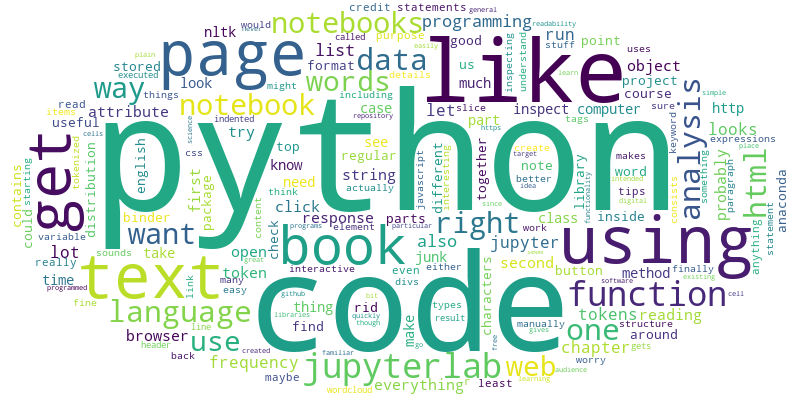

In [22]:
from corpy.vis import wordcloud

wordcloud(freq_dist, size=(800, 400), rounded=True)

Whew! That was actually a lot of work. Now that we've figured out how to
do this, we could package all of these steps into a reusable recipe, so
that we don't have to re-cobble all of this together if we want to run a
same analysis on a different chapter. We can do so by writing a
function. Again, as with for-loops and if statements, everything that's
indented under the function header starting with `def` is part of the
function body, and will be run step by step each time the function is
**called**.

In [23]:
def chapter_wordcloud(link, size=(800, 400), rounded=True):
    session = HTMLSession()
    response = session.get(link)
    divs = response.html.find(".rendered_html", clean=True)
    string = "\n".join(div.text for div in divs)
    tokenized = nltk.word_tokenize(string.lower())
    stop_set = set(nltk.corpus.stopwords.words("english"))
    cleaned = []
    for token in tokenized:
        if token.isalpha() and token not in stop_set:
            cleaned.append(token)
    # if we want just the wordcloud, we can also directly create it from
    # a list of tokens, without making an intermediate nltk.FreqDist
    return wordcloud(cleaned, size=size, rounded=rounded)

The `return` keyword specifies what the result is that the function
spits out at the other end. Once the function reaches a return
statement, it stops execution and gives the result back to whoever
called the function.

We can now easily create a wordcloud based on the final chapter of this
book, for comparison.

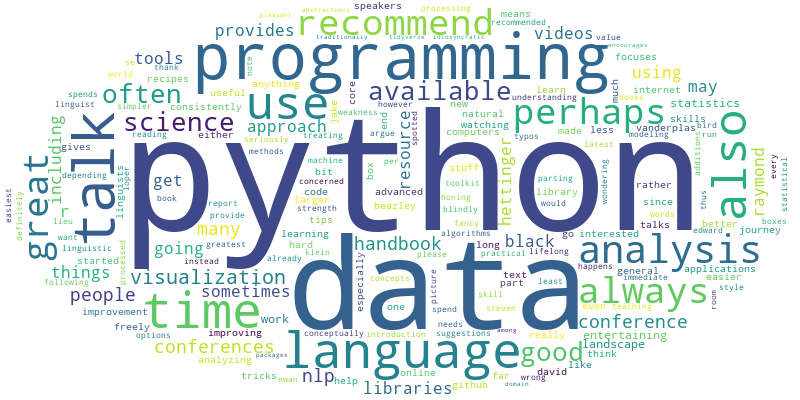

In [24]:
chapter_wordcloud("https://v4py.github.io/outro.html")

Indeed, we can use this function on any chapter in any online book
created (much like the present book) with the [jupyter-book]() package,
because they all use the same HTML structure. For instance, here's a
wordcloud of the chapter on [*Regular
Expressions*](https://www.textbook.ds100.org/ch/08/text_regex.html) from
the book [*Principles and Techniques of Data
Science*](https://www.textbook.ds100.org/).

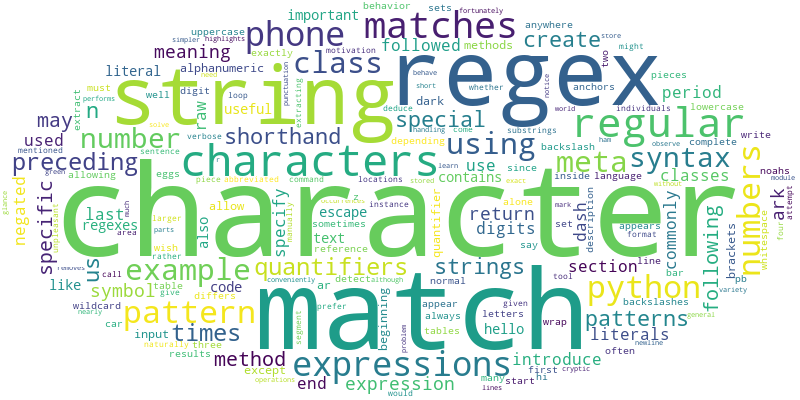

In [25]:
chapter_wordcloud("https://www.textbook.ds100.org/ch/08/text_regex.html")

This is the real power of programming: once you've figured out and
tweaked a processing and analysis recipe, you can apply it to similar
data with lightning speed and each time consistently in exactly the same
way.

To wrap up, let me reiterate that I realize this is a lot to take in if
this is your first time seeing Python code, and even more so if this is
your first time seeing any programming language code whatsoever. Again,
it's totally fine if you don't understand all the details at this point.
I encourage you to revisit this extended worked example once you're done
reading the book, as a way to reflect on what you've learned and bring
it all together.

<!-- TODO: remove or develop -->

<!-- # NLTK Book -->

<!-- A great, longer free resource. <http://www.nltk.org/book/> -->

<!-- ![NLTK Book](./nltk_book.jpg) -->

<!-- Credit: ??? -->

<!-- # The NLP pipeline -->

<!-- NOTE: maybe leave this out? Not strictly necessary, this is probably -->
<!-- better to discuss in class, plus I shouldn't rely too much on NLTK Book -->
<!-- materials for licensing reasons. -->

<!-- ![NLP](./dialogue.png) -->

<!-- Credit: ??? -->

<!-- # Overview -->

<!-- - Python basics (functions, control flow, collections) -->
<!-- - The NLTK [package](http://www.nltk.org/) & -->
<!--   [book](http://www.nltk.org/book) as a good starting point for people -->
<!--   interested in language data -->
<!-- - [How text is represented inside -->
<!--   computers](https://dlukes.github.io/unicode.html) -->
<!-- - Regular expressions in Python -->
<!-- - Accessing web services ("REST APIs") from Python & Automatic -->
<!--   annotation of language data (tagging, parsing) - both courtesy of -->
<!--   [Rudolf Rosa](https://ufal.mff.cuni.cz/rudolf-rosa) -->
<!-- - Getting data into Python (raw text & tabular data) -->
<!-- - Some visualizations (dispersion plots, wordclouds) -->
<!-- - Case studies: collocation strength, keyword analysis -->

<!-- vim: set spell spelllang=en: -->